<a href="https://colab.research.google.com/github/aryamangoenka/ML-and-Finance/blob/main/ML_and_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Run this code cell to confirm you are connected to a GPU runtime!
# @markdown If you run into an error here, the notebook should still work, but your model will take much longer to train!

import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# **Milestone 1: Learning and understanding the BERT ML technique and its significance in NLP.**

In [2]:
#@title Run this to download data and prepare our environment! { display-mode: "form" }

!pip install transformers
import os
import gdown
import torch
import numpy as np
import seaborn as sns
import transformers
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import pad_sequences
from sklearn import metrics

from transformers import BertTokenizer
from transformers import get_linear_schedule_with_warmup
from transformers import BertForSequenceClassification, BertConfig
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import AdamW

%matplotlib inline

# gdown.download('https://drive.google.com/uc?id=1q4U2gVY9tWEPdT6W-pdQpKmo152QqWLE', 'finance_train.csv', True)
# gdown.download('https://drive.google.com/uc?id=1nIBqAsItwVEGVayYTgvybz7HeK0asom0', 'finance_test.csv', True)

!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

print ("Train and Test Files Loaded as train.csv and test.csv")

LABEL_MAP = {0 : "negative", 1 : "neutral", 2 : "positive"}
NONE = 4 * [None]
RND_SEED=2020

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ["Negative","Neutral","Positive"]
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure(figsize=(7,6))
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()

--2024-11-09 21:50:41--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29264 (29K) [application/vnd.ms-excel]
Saving to: ‘finance_test.csv’

finance_test.csv    100%[===================>]  28.58K  --.-KB/s    in 0s      

2024-11-09 21:50:41 (98.3 MB/s) - ‘finance_test.csv’ saved [29264/29264]

--2024-11-09 21:50:41--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis

In [4]:
#@title Exercise. What are some interesting NLP concepts or unique aspects of the BERT model you learned in the video?
_1_ = 'Masked language modeling - predict missing words in sentences and understand contextual nuances' #@param {type:"string"}
_2_ = 'Contextual word embeddings' #@param {type:"string"}
_3_ = 'Transformer Architecture - stacked encoders and special tokens like CLS and SEP' #@param {type:"string"}

# **Milestone 2: Preprocessing data for BERT and training our model.**



**bold text**## **Reading in the Datasets**

Just as in previous notebooks, use the `get_finance_train()` and `get_finance_test()` methods to get the train and test datasets and save them in variables named `df_train` and `df_test` respectively.

In [59]:
df_train = None ### YOUR CODE HERE
df_test = None ### YOUR CODE HERE

In [60]:
#@title Instructor Solution

df_train = get_finance_train()
df_test = get_finance_test()

For simplicity, save sentences and labels columns of `df_train` in variables named `sentences` and `labels` respectively.


**Note: To access a column from a dataframe based on the column name, you can use the code structure: `column = df_train["column_name"].values`. Replace `column_name` with your desired column to access it.**

In [61]:
sentences = None ### YOUR CODE HERE
labels = None ### YOUR CODE HERE

In [62]:
#@title Instructor Solution
sentences = df_train['Sentence'].values
labels = df_train['Label'].values

#### Step 1 : Create the Tokenizer ####

#### **Coding Exercise: Tokenize with Bert**

When using BERT, our text needs to be split into tokens and those tokens need to be mapped to an index using BERT's vocabulary. We will use the `BertTokenizer` module from the transformer library to tokenize our data. To do so, call the function `BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case = True)` and save the returned value in a variable named `tokenizer`.

In [63]:
tokenizer = None ### YOUR CODE HERE

In [64]:
#@title Instructor Solution

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case = True)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


#### **Coding Exercise: Vocabulary Size**

The BERT Tokenizer object you created keeps track of the size of the vocabulary we are dealing with in this dataset. Find and print the number of unique tokens in the BERT model by calling `tokenizer.vocab_size`.

In [65]:
### YOUR CODE HERE

### END CODE

In [66]:
#@title Instructor Solution

print(tokenizer.vocab_size)

30522


#### **Coding Exercise: Applying the tokenizer**

Apply the tokenizer to the first element in your training dataset: `sentences[0]`. To do so, call the `tokenizer.tokenize(SENTENCE)` function while passing in your sentence in place of `SENTENCE` as shown. Print the original sentence relative to the tokenized sentence.

In [67]:
### YOUR CODE HERE

### END CODE

In [68]:
#@title Instructor Solution
original_sentence = sentences[0]
tokenized_sentence = tokenizer.tokenize(original_sentence)
print('Original Sentence: ', original_sentence)
print('Tokenized Sentence: ', tokenized_sentence)

Original Sentence:  Autotank Group is part of Aspo 's Systems Division .
Tokenized Sentence:  ['auto', '##tan', '##k', 'group', 'is', 'part', 'of', 'as', '##po', "'", 's', 'systems', 'division', '.']


#### **Discussion Exercise: BERT Tokens**

What do you think about the BERT generated tokens? What do think is the significance of some of the stranger tokens and the # characters?

## Instructor Solution
<details><summary>click to reveal!</summary>

BERT-generated tokens, including complete words and subwords, are designed to handle diverse and complex language patterns. The use of subword tokens, indicated by "##", allows BERT to effectively manage rare or unknown words by breaking them down into familiar components. This approach enhances BERT's understanding and representation of words, even those not seen during training. The presence of stranger tokens and subwords helps the model cover a wide vocabulary range, ensuring comprehensive language comprehension. These tokens enable BERT to capture nuanced meanings and context, improving its performance on various natural language processing tasks.

#### Step 2 : Map the tokens to our index ####

Each token has a corresponding index in the vocabulary. To keep track of the vector representations more concisely, we will convert each of the tokenized lists into a list of indices.



#### **Coding Exercise: Map tokens to indices**

Map the tokens to indices on the first element in your training dataset: `sentences[0]`. To do so,  use the `convert_tokens_to_ids()` function of the `tokenizer` to encode our word tokens into numerical values. Call the command `tokenizer.convert_tokens_to_ids(TOKENIZED_SENTENCE)` passing in the tokenized version of `sentences[0]` that you created above for `TOKENIZED_SENTENCE`. Print the tokenized sentence relative to the mapped indices sentence.

In [69]:
### YOUR CODE HERE

### END CODE

In [70]:
#@title Instructor Solution
original_sentence = sentences[0]
tokenized_sentence = tokenizer.tokenize(original_sentence)
print('Tokenized Sentence: ', tokenized_sentence)
print('Mapped Indices Sentence: ', tokenizer.convert_tokens_to_ids(tokenized_sentence))

Tokenized Sentence:  ['auto', '##tan', '##k', 'group', 'is', 'part', 'of', 'as', '##po', "'", 's', 'systems', 'division', '.']
Mapped Indices Sentence:  [8285, 5794, 2243, 2177, 2003, 2112, 1997, 2004, 6873, 1005, 1055, 3001, 2407, 1012]


### Text Formatting ###

When using BERT, we need to modify our input to match the BERT Format. To do so, we will apply these three steps on the input sentences:

1. Add special tokens to the start (`[CLS]`) and end (`[SEP]`) of each sentence.
2. Pad & truncate all sentences to a single constant length.
3. Explicitly differentiate real tokens from padding tokens with the "attention mask".

Take note of the visualization on **Sentence A** below that elucidates these steps. However, let us understand each of these steps in more detail before proceeding to apply them to our dataset.

![picture](https://drive.google.com/uc?id=1sN5pvRjF1PnV72AXu9d8DLVDllAYOBzk)

#### **Special Tokens** ####

These are two tokens we add to the start and end respectively:



*   `[CLS]` - stands for "classification," and is used to identify new sentences.
*   `[SEP]` - stands for "separator," and identifies if a pair of sentences are consecutive in a corpus or not (used for next sentence prediction).



#### **Coding Exercise: Add special tokens**

We want to add these special tokens to the start and end of each one of our preprocessed sentences. To do so, fill out the code below to loop through your `sentences` array and create a new sentence that adds `"[CLS] "` to the start of the sentence and that adds `" [SEP]"` to the end of the sentence. Add the newly modified sentence to the list variable named `sentences_with_special_tokens`.

**Note: When you add the `"[CLS] "` string to the front of the sentence, ensure that you add it with the space character at the end as shown. Similarly, add the `" [SEP]"` string to the end of the sentence with a space character at the start as shown.**

In [71]:
sentences_with_special_tokens = []
### YOUR CODE HERE

### END CODE

In [72]:
#@title Instructor Solution

sentences_with_special_tokens = []
for sentence in sentences:
  new_sentence = "[CLS] " + sentence + " [SEP]"
  sentences_with_special_tokens.append(new_sentence)
print(sentences_with_special_tokens[0])

[CLS] Autotank Group is part of Aspo 's Systems Division . [SEP]


#### **Coding Exercise: Tokenize your sentences**

Now we will tokenize our new list of input sentences using our BERT `tokenizer`. Do so by looping through your new `sentences_with_special_tokens` list and apply `tokenizer.tokenize(SENTENCE)` to each sentence. Add each tokenized sentence to a list named `tokenized_texts`.

In [73]:
tokenized_texts = []
### YOUR CODE HERE

### END CODE

In [74]:
#@title Instructor Solution
tokenized_texts = []
for sentence in sentences_with_special_tokens:
  tokenized_sentence = tokenizer.tokenize(sentence)
  tokenized_texts.append(tokenized_sentence)
print(tokenized_texts[0])

['[CLS]', 'auto', '##tan', '##k', 'group', 'is', 'part', 'of', 'as', '##po', "'", 's', 'systems', 'division', '.', '[SEP]']


#### **Sentence Length** ####

Since our input has sentences of varying length, we need to pad them to be the same length. BERT has the follow constraints on sentence length:
1. All sentences must be padded or truncated to a single, fixed length.
2. The maximum sentence length is 512 tokens.

In order to handle this, every input sequence is padded to pre-defined fixed length with a special `[PAD]` token, which pads the sequence with zeros.


[link text](https://)#### **Coding Exercise: Encode tokenized sentences with indices**

Before we properly pad the sentences, we will first map each token to its corresponding index for each tokenized sentence. To do so, we will loop through your `tokenized_texts` variable call the `tokenizer.convert_tokens_to_ids(TOKENIZED_SENTENCE)` while passing in your tokenized sentence to convert it to a list of corresponding indices. Add each converted list to the variable named `input_ids`.

In [75]:
input_ids = []
### YOUR CODE HERE

### END CODE

In [76]:
#@title Instructor Solution
input_ids = []
for text in tokenized_texts:
  new_list = tokenizer.convert_tokens_to_ids(text)
  input_ids.append(new_list)
print(input_ids[0])

[101, 8285, 5794, 2243, 2177, 2003, 2112, 1997, 2004, 6873, 1005, 1055, 3001, 2407, 1012, 102]


[link text](https://)#### **Coding Exercise: Padding your input**

Now we will pad our input to ensure that every sequence has the same length. To do so, we will utilize the `keras` function named `pad_sequences()`. Call the function below to properly pad your sequences. We want to pad every sequence to a length of `128`, so ensure that you pass in `128` for `maxlen` in the function call. Print the first element of your new `input_ids` to observe the new padded sequence.

In [77]:
input_ids = pad_sequences(input_ids,
                          maxlen=None, ### YOUR CODE HERE
                          dtype="long",
                          truncating="post",
                          padding="post")

In [78]:
#@title Instructor Solution

input_ids = pad_sequences(input_ids,
                          maxlen=128,
                          dtype="long",
                          truncating="post",
                          padding="post")
print(input_ids[0])

[ 101 8285 5794 2243 2177 2003 2112 1997 2004 6873 1005 1055 3001 2407
 1012  102    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


####**Attention Masks**####

An Attention Mask is an array of 1s and 0s indicating which tokens are padding and which are not. The idea behind attention masks is that we do not want the extra padded sequence tokens to contribute to the input features of the machine learning model. So, we essentially zero them out to highlight their insignificance before passing them through the model.

Each sequence has a corresponding attention mask. Consider the input sequence below and its corresponding attention mask. We want to create an attention mask for each sequence before passing our data through the BERT model.






![picture](https://drive.google.com/uc?id=1LgtkmZU8fQZsn9L85lENHgGxej3i61TP)

#### **Coding Exercise: Create attention masks**

Create an attention mask for each sequence in your `input_ids` list. The attention mask for a particular tokenized sequence will have the same exact length and will have a `1.0` at every index that there is a token and a `0.0` at every index that there is a padding. Loop through your `input_ids` and for each sequence create a corresponding attention mask and add it to the `attention_masks` list.

**Hint: To get the attention mask given a tokenized sequence, you may use the line of code `mask=[float(i>0) for i in SEQUENCE]` where `SEQUENCE` is an element of your `input_ids` list.**

In [79]:
attention_masks = []

###YOUR CODE HERE###


###END CODE ###

In [80]:
#@title Instructor Solution
attention_masks = []
for sequence in input_ids:
  mask = [float(i > 0) for i in sequence]
  attention_masks.append(mask)
print (attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## **Setting up your Data for BERT**

Finally, we need to split our data and convert it to objects that will work most efficiently with the BERT model training procedure. Specifically, we will split our training data into training and validation sets. Additionally, we will convert our data objects into `tensor` s such that we can easily feed the input into the model.

#### **Coding Exercise: Train/Test Split**

To run machine learning models, we first need to split our dataset into training and validation sections. We can do so by using the `train_test_split()` function. One call to this function returns four separate items:
  1. X_train
  2. X_val
  3. y_train
  4. y_val

We will save these returned elements in variables with respective names. Call the `train_test_split()` function, passing in `input_ids`, `labels`, `test_size=0.15`, and `random_state=RND_SEED`.

In [81]:
X_train, X_val, y_train, y_val = NONE ### YOUR CODE HERE

In [82]:
#@title Instructor Solution
X_train, X_val, y_train, y_val = train_test_split(input_ids,
                                                  labels,
                                                  test_size=0.15,
                                                  random_state=RND_SEED)

We also want to split our attention masks in the same way. Similarly, call the `train_test_split()` function, passing in `attention_masks`, `input_ids`, `test_size=0.15`, and `random_state=RND_SEED`. However, we only need to save the first two returned items in variables named `train_masks` and `validation_masks`.

In [83]:
train_masks, validation_masks, _, _ = NONE ### YOUR CODE HERE

In [84]:
#@title Instructor Solution
train_masks, validation_masks, _, _ = train_test_split(attention_masks,
                                                       input_ids,
                                                       test_size=0.15,
                                                       random_state=RND_SEED)

In addition to converting our data to `tensor`, `tensorflow` array objects, we will also create a `DataLoader` for our input. A `DataLoader` is simply an object that simplifies and streamlines feeding in data to our model.

In [85]:
#@title Run this cell to convert data to tensors and create DataLoaders
train_inputs = torch.tensor(np.array(X_train));
validation_inputs = torch.tensor(np.array(X_val));
train_masks = torch.tensor(np.array(train_masks));
validation_masks = torch.tensor(np.array(validation_masks));
train_labels = torch.tensor(np.array(y_train));
validation_labels = torch.tensor(np.array(y_val));

batch_size = 32
train_data = TensorDataset(train_inputs, train_masks, train_labels);
train_sampler = RandomSampler(train_data); # Samples data randonly for training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size);
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels);
validation_sampler = SequentialSampler(validation_data); # Samples data sequentially
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size);

# **Milestone 3: Running and finetuning our BERT model with the PyTorch huggingface transformer library.**





To use BERT in our sentiment analysis, we first want to modify BERT to output either a positive, neutral, or negative classification. Next,  we want to train the model on our dataset so that the entire model, end-to-end, is well-suited to our task.

The huggingface PyTorch implementation includes a set of interfaces designed for a variety of NLP tasks. These interfaces are all built on top of a pre-trained BERT model, and each has different top layers and output types designed to accomodate their specific NLP task. (An analogy: imagine BERT is a garden hose; then the huggingface PyTorch interfaces are like different nozzles for the garden hose, so we can use it for "jet," "mist," etc.)

For our sentiment classification task we will use:

* **BertForSequenceClassification** - This is the normal BERT model with an added single linear layer on top for classification that we will use as a sentence classifier. As we feed input data, the entire pre-trained BERT model and the additional untrained classification layer is trained on our specific task.


The documentation for this can be found [here](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForSequenceClassification).

We will create a `BertForSequenceClassification` model and save it in a variable named `model`.

In [ ]:
#@title Run this cell to initialize your BertForSequenceClassification model
#Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT small model, with an uncased vocab.
    num_labels = 3,
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
);

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

if tf.test.gpu_device_name() == '/device:GPU:0':
  # Given that this a huge neural network, we need to explicity specify
  # in pytorch to run this model on the GPU.
  model.cuda();

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### **Coding Exercise: Initialize hyperparameters**

There are two hyperparameters we will consider: **Learning rate** and **Epochs**. Improperly setting these hyperparamters could lead to overfitting or underfitting. We will set these values as follows:

1. **Learning rate**: 2e-5
2. **Epochs**: 4

The learning rate parameter comes as part of an optimizer object that we use in our model. Only change the value of the `lr` variable inside the `AdamW` object. Fill in these hyperparameter values below and run the code cell before proceeding. Revisit this cell after you complete the notebook to try and improve your model through modifying these parameter values!

NOTE: if you are connected to a CPU runtime, BERT will take 10-15 minutes to run each epoch! Feel free to reduce the number of epochs here if you're not able to connect to a GPU runtime.

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, ### YOUR CODE HERE
                  eps = 1e-8
                )
epochs = 4

#### **Discussion Exercise: Training Model Steps**

Below are a list of steps taken to train the model listed in no particular order. Look at the steps and discuss the significance of each. Afterwards, order the steps based on how you think the model training procedure is carried out and list them in order below.

Training Steps:
*   Backward pass (backpropagation)
*   Clear out the gradients calculated in the previous pass
*   Update parameters
*   Unpack our data inputs and labels from the DataLoader objects
*   Forward pass (feed data through network)

## Instructor Solution
<details><summary>click to reveal!</summary>

Each step in training a model plays a critical role:

1. **Unpack data inputs and labels**: Extract data batches for processing.
2. **Forward pass**: Feed data through the network to obtain predictions.
3. **Clear gradients**: Reset gradients to zero to avoid accumulation from previous iterations.
4. **Backward pass**: Compute gradients via backpropagation, adjusting weights based on error.
5. **Update parameters**: Apply gradient updates to model parameters to minimize loss.

Ordering these steps ensures efficient training by first preparing data, predicting outcomes, calculating and clearing gradients, and then updating the model to improve performance.

In [ ]:
#@title Exercise. Ordered Model Training Steps

_1_ = '' #@param {type:"string"}
_2_ = '' #@param {type:"string"}
_3_ = '' #@param {type:"string"}
_4_ = '' #@param {type:"string"}
_5_ = '' #@param {type:"string"}

print('{}\n{}\n{}\n{}\n{}'.format(
    '1. Unpack our data inputs and labels from the DataLoader objects',
    '2. Clear out the gradients calculated in the previous pass',
    '3. Forward pass',
    '4. Backward pass',
    '5. Update hyperparamters'))

1. Unpack our data inputs and labels from the DataLoader objects
2. Clear out the gradients calculated in the previous pass
3. Forward pass
4. Backward pass
5. Update hyperparamters


In [ ]:
#@title Run this cell to train your model!

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

# We'll store training and validation loss,
# validation accuracy, and timings.
training_loss = []
validation_loss = []
training_stats = []
for epoch_i in range(0, epochs):
    # Training
    print('Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training the model')
    # Reset the total loss for  epoch.
    total_train_loss = 0
    # Put the model into training mode.
    model.train()
    # For each batch of training data
    for step, batch in enumerate(train_dataloader):
        # Progress update every 40 batches.
        if step % 20 == 0 and not step == 0:
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}. '.format(step, len(train_dataloader)))

        # STEP 1 & 2: Unpack this training batch from our dataloader.
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # STEP 3
        # Always clear any previously calculated gradients before performing a
        # backward pass.
        model.zero_grad()

        # STEP 4
        # Perform a forward pass (evaluate the model on this training batch).
        # It returns the loss (because we provided labels) and
        # the "logits"--the model outputs prior to activation.
        outputs = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)
        loss = outputs[0]
        logits = outputs[1]
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_train_loss += loss.item()

        # STEP 5
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # STEP 6
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    # Validation
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("Evaluating on Validation Set")
    # Put the model in evaluation mode
    model.eval()
    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        #Step 1 and Step 2
        # Unpack this validation batch from our dataloader.

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # The "logits" are the output
            # values prior to applying an activation function like the softmax.
            outputs = model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            loss = outputs[0]
            logits = outputs[1]

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("Validation Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)



    print("Validation Loss: {0:.2f}".format(avg_val_loss))


    training_loss.append(avg_train_loss)
    validation_loss.append(avg_val_loss)
    # Record all statistics from this epoch.

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy

        }
    )

print("Training complete!")

Epoch 1 / 4 ========
Training the model
  Batch    20  of     55. 
  Batch    40  of     55. 
  Average training loss: 0.60
Evaluating on Validation Set
Validation Accuracy: 0.80
Validation Loss: 0.44
Epoch 2 / 4 ========
Training the model
  Batch    20  of     55. 
  Batch    40  of     55. 
  Average training loss: 0.33
Evaluating on Validation Set
Validation Accuracy: 0.90
Validation Loss: 0.28
Epoch 3 / 4 ========
Training the model
  Batch    20  of     55. 
  Batch    40  of     55. 
  Average training loss: 0.16
Evaluating on Validation Set
Validation Accuracy: 0.95
Validation Loss: 0.17
Epoch 4 / 4 ========
Training the model
  Batch    20  of     55. 
  Batch    40  of     55. 
  Average training loss: 0.08
Evaluating on Validation Set
Validation Accuracy: 0.95
Validation Loss: 0.14
Training complete!


#### **Coding Exercise: Plot your losses!**

When we trained the model above, the training and validation losses were saved in variables named `training_loss` and `validation_loss` respectively. Let us plot these curves and analyze what we see!



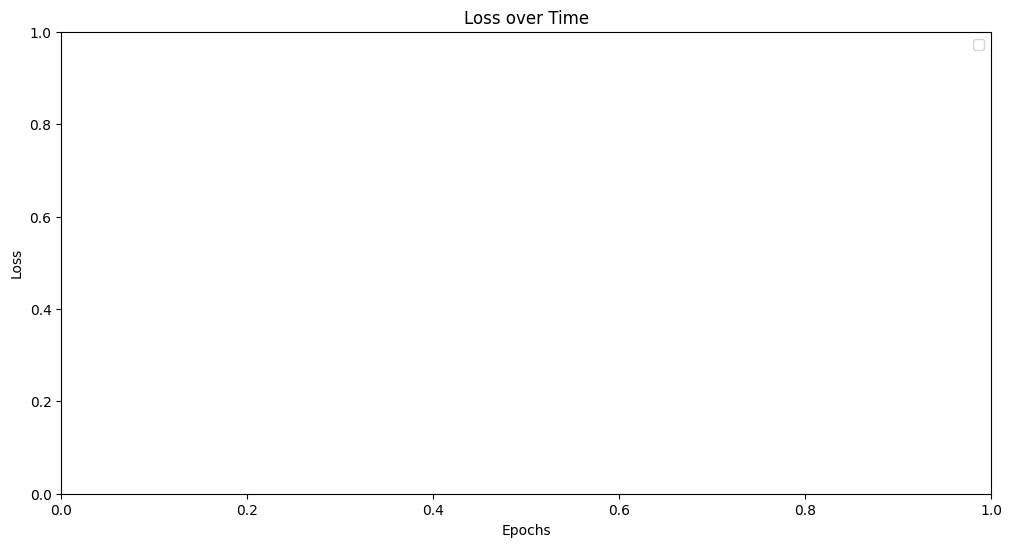

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.title('Loss over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')

### YOUR CODE HERE

### END CODE

plt.legend()
plt.show()

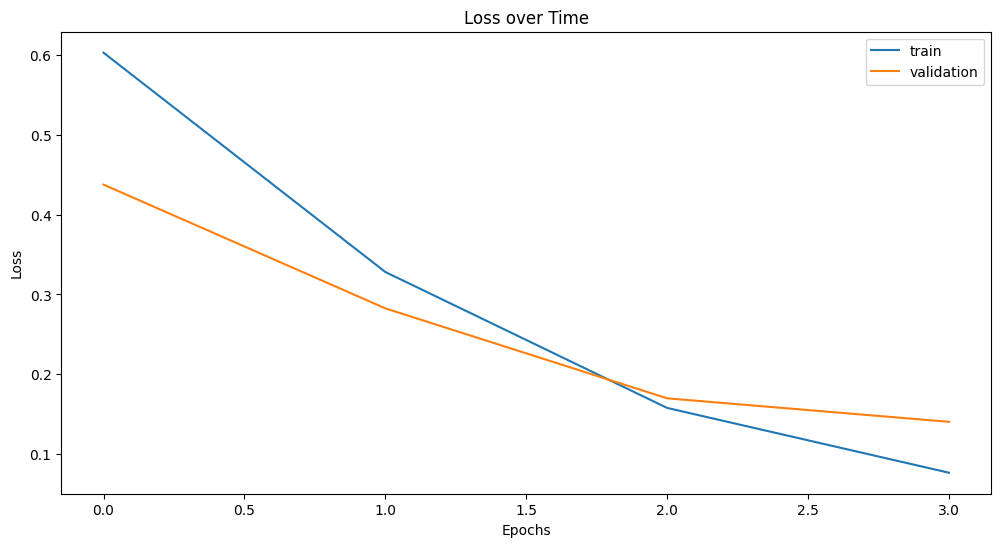

In [ ]:
#@title Instructor Solution

fig = plt.figure(figsize=(12,6))
plt.title('Loss over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(training_loss, label='train')
plt.plot(validation_loss, label='validation')

plt.legend()
plt.show()

#### **Coding Exercise: Evaluate your test set accuracy.**

To be able to assess the accuracy on the test set, we need to carry out the data preprocessing, tokenization, padding, and formatting on the test set saved in `df_test` from earlier.

First, to make this process easier, save the sentences and labels from `df_test` in variables named `test_sentences` and `test_labels`.

**Note: To access a column from a dataframe based on the column name, you can use the code structure: `column = df_test["column_name"].values`. Replace `column_name` with your desired column to access it.**



In [ ]:
### YOUR CODE HERE

### END CODE

In [ ]:
#@title Instructor Solution

test_sentences = df_test.Sentence.values
test_labels = df_test.Label.values

Now we will format our test input data similarly to how we formatted our training input data. Run the cell below to create the variables `test_input_ids` and `test_attention_masks`.

In [ ]:
#@title Run this cell to process and prepare our test data!
test_input_ids, test_attention_masks = [], []

# Add Special Tokens
test_sentences = ["[CLS] " + sentence + " [SEP]" for sentence in test_sentences]

# Tokenize sentences
tokenized_test_sentences = [tokenizer.tokenize(sent) for sent in test_sentences]

# Encode Tokens to Word IDs
test_input_ids = [tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_test_sentences]

# Pad the inputs
test_input_ids = pad_sequences(test_input_ids,
                               maxlen=128,
                               dtype="long",
                               truncating="post",
                               padding="post")

# Create Attention Masks
for sequence in test_input_ids:
  mask = [float(i>0) for i in sequence]
  test_attention_masks.append(mask)

Just as before, we will convert our data to `tensor` and create a `DataLoader` for our inputs.

In [ ]:
#@title Run this cell to convert data to tensors and create DataLoaders
batch_size = 32
test_input_ids = torch.tensor(test_input_ids)
test_attention_masks = torch.tensor(test_attention_masks)
test_labels = torch.tensor(test_labels)
prediction_data = TensorDataset(test_input_ids, test_attention_masks, test_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Finally, run the cell below to evaluate your accuracy on your test dataset!

Predicting labels for 227 test sentences...
Test Accuracy: 95.59%
Plotting the Confusion Matrix


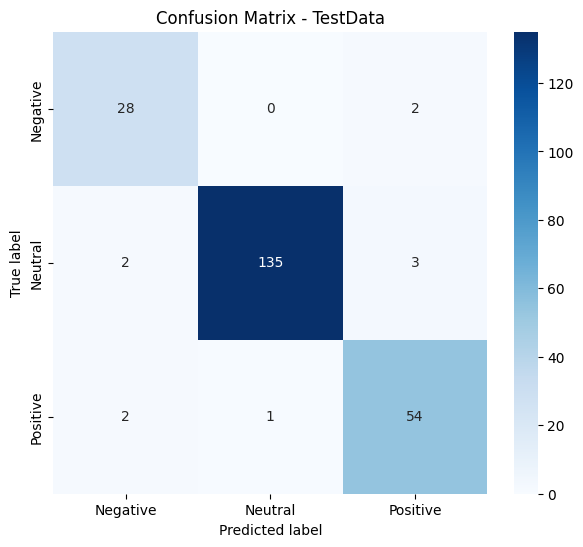

In [ ]:
#@title Evaluate Test Set Accuracy!
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

# Final tracking variables
y_logits, y_true, y_preds = [], [], []

# Gather logit predictions
for chunk in predictions:
  for logits in chunk:
    y_logits.append(logits)

# Gather true labels
for chunk in true_labels:
  for label in chunk:
    y_true.append(label)

# Gather real predictions
for logits in y_logits:
  y_preds.append(np.argmax(logits))

print ('Test Accuracy: {:.2%}'.format(metrics.accuracy_score(y_preds,y_true)))
plot_confusion_matrix(y_true,y_preds)

#### **Discussion Exercise: Significance of your test accuracy**

What do you think about the accuracy of your model? Do you think it would perform just as well on a larger dataset?

## Instructor Solution
<details><summary>click to reveal!</summary>

The accuracy of the model on the test dataset indicates its performance on unseen data. If the accuracy is high and the model generalizes well, it suggests effective learning. However, performance on a larger dataset may vary. If the model is overfitting, it might not perform as well on a larger or more diverse dataset. Ensuring the model is validated with cross-validation and tested on varied data samples can give better insights. Improvements like regularization and hyperparameter tuning can help maintain performance on larger datasets, ensuring robustness and generalization.

# Congratulations on completing your BERT Model!

## **Wrap-Up**

In this notebook, you've:

 - Learned about the advanced BERT model
 - Learned to format and filter data for efficent model training and testing.

Over these three notebooks, you have delved into NLP + Finance and have gained subject matter knowledge that will allow you to devise intelligent finance-related models. You can take your newly acquired skills and apply them to other domains and datasets for several other tasks. For example, you may take your skills and utilize sentiment analysis to predict stock prices! The sky's the limit with your newfound skills and expertise!
